<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018

En este notebook se aborda un ejemplo de aplicación del algoritmo k-NN para la clasificación de imágenes en dos categorías: perros o gatos, utilizando SKLearn.

<hr>
## k-Vecinos Cercanos (k-NN)

Una aproximación más sofisticada, clasificación k-NN, encuentra un grupo de $k$ objetos en el conjunto de entrenamiento que se encuentran más cerca del objeto de prueba, y asigna una clase al mismo basado en la predominancia de una clase particular en el vecindario.
<img src="res/knn/knn.png" width="400">
Dados un conjunto de entrenamiento $(X,Y)$ y un objeto de prueba $x_i$, el algoritmo computa la distancia o similaridad entre $x_i$ y todos los objetos de entrenamiento que pertenecen a $(X,Y)$ para determinar la lista de vecinos más cercanos.  Una vez se obtiene dicha lista, $x_i$ se clasifica con la clase de mayor aparición en su vecindario (mayoría de votos). 
<img src="res/knn/knn_example.png" width="700">

<hr>
# Perro o Gato?

<img src="res/knn/clasificacion.png" width="500">

<hr>
## Caracteristicas...

Una forma de enfrentar este problema, es tomar los píxeles como características de las imágenes que se desea clasificar. Esta aproximación es ingenua, ya que en una imagen existe más información que la simple secuencia de los píxeles que la componen. Sin embargo para este caso procedamos de esta manera.

('image shape: ', (374, 500, 3))


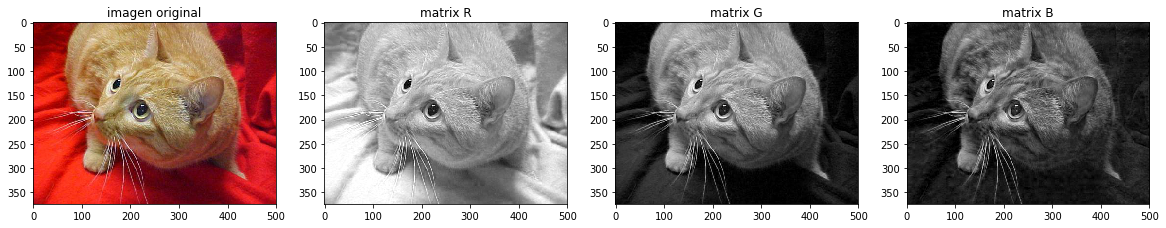

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

cat_image = imread("dataset/train/cats/cat.18.jpg")
print("image shape: ", cat_image.shape)

f, ax = plt.subplots(1,4, figsize=(20,10))
ax[0].imshow(cat_image, cmap='gray')
ax[0].set_title("imagen original")
ax[1].imshow(cat_image[:,:,0], cmap='gray')
ax[1].set_title("matrix R")
ax[2].imshow(cat_image[:,:,1], cmap='gray')
ax[2].set_title("matrix G")
ax[3].imshow(cat_image[:,:,2], cmap='gray')
ax[3].set_title("matrix B")

plt.show()

## Reshape...

/home/mlsandbox/.conda/envs/deeplearning/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


('new shape: ', (64, 64, 3))


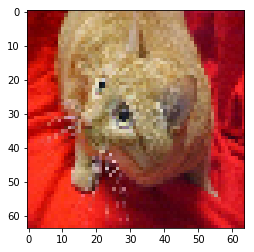

('flattened shape: ', (1, 12288))


In [4]:
from skimage.transform import resize

cat_image_resize = resize(cat_image, (64,64))
print("new shape: ", cat_image_resize.shape)

plt.imshow(cat_image_resize)
plt.show()

'''
a = np.random.randn(3,3,3)
print(a.shape)
print(a)
a_flat = a.flatten()
print(a_flat.shape)
print(a_flat)
'''

#Transformams la imagen en un vector de (1, 64x64x3) = (1, 12288)
cat_image_x = cat_image_resize.flatten().reshape(1, 12288)
print("flattened shape: ",cat_image_x.shape)

In [5]:
from os import listdir
from os.path import isfile


def get_dataset_size(path):
    cat_files = listdir(path)
    
    number_of_images = 0
    for f in cat_files:
        if(not(f.startswith(".")) and f.endswith(".jpg")):
            number_of_images += 1
    
    return number_of_images

def load_dataset(folder_path, imsize=(64,64,3), class_index=0):
    
    folder_files = listdir(folder_path)
    folder_len = get_dataset_size(folder_path)
    
    flattened_size = imsize[0]*imsize[1]*imsize[2]
    
    X = np.zeros([folder_len, flattened_size])
    Y = np.ones([folder_len, 1]) * class_index
    
    i = 0
    for f in folder_files:
        if(not(f.startswith(".")) and f.endswith(".jpg")):
            t = imread(folder_path+f)
            t_reshape = resize(t, imsize)
            X[i, :] = t_reshape.flatten().reshape(1, flattened_size)
            i += 1
    
    return (X, Y)

## Crear dataset de entrenamiento (train set)

In [6]:
root_path = "dataset/train/"
cats_path = "cats/"
dogs_path = "dogs/"

(X_cats, Y_cats) = load_dataset(root_path+cats_path, class_index=0)
(X_dogs, Y_dogs) = load_dataset(root_path+dogs_path, class_index=1)

X_train = np.concatenate((X_cats, X_dogs))
Y_train = np.concatenate((Y_cats, Y_dogs))

## Crear dataset de prueba (dev set)

In [8]:
root_path = "dataset/test/"
cats_path = "cats/"
dogs_path = "dogs/"

(X_cats, Y_cats) = load_dataset(root_path+cats_path, class_index=0)
(X_dogs, Y_dogs) = load_dataset(root_path+dogs_path, class_index=1)

X_dev = np.concatenate((X_cats, X_dogs))
Y_dev = np.concatenate((Y_cats, Y_dogs))

print X_dev.shape

(40, 12288)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
neigh.fit(X_train, Y_train)

/home/mlsandbox/.conda/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Testing sobre el dev set

In [10]:
def SME(y, y_hat):
    error = np.sum((y-y_hat)**2)/len(y)
    
    return error

In [11]:
y_hat = neigh.predict(X_dev).reshape(len(Y_dev),1)

error = SME(Y_dev, y_hat)

print(error)

0.375


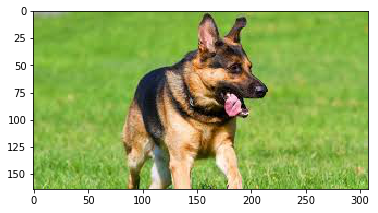

("It's a: ", 'dog')


In [14]:
#image = imread("dataset/train/dogs/dog.80.jpg")
image = imread("dataset/test/dog1.jpeg")

plt.imshow(image)
plt.show()

x = resize(image, (64,64)).reshape(1, 12288)

y_hat = int(neigh.predict(x)[0])

classes = ["cat", "dog"]

print("It's a: ",classes[y_hat])